# Implementación y visualización Kmeans en 2D

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

import scipy.stats
from sklearn.cluster import KMeans


In [2]:
%config IPCompleter.greedy = True
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
df = pd.read_csv("kmeans_1.csv")

In [40]:
df

,X,Y
0,-3.184130,-3.536314
1,-2.733986,-1.697214
2,-1.425085,-0.209609
3,-3.141817,-3.699481
4,-1.793601,-1.057569
...,...,...
395,11.956448,12.425121
396,10.739713,12.317352
397,11.819767,13.338702
398,11.699919,12.355441


In [41]:
### Visualizamos la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [42]:
### Valores nulos
for i in df.columns:
    print(i+': '+str(df[i].isnull().sum()))

X: 0
Y: 0


In [43]:
### Resumen de Información
df.describe()

,X,Y
count,400.000000,400.000000
mean,6.115438,6.081052
std,5.455048,5.516247
min,-4.574359,-4.467846
25%,2.278986,1.759130
50%,7.077546,6.678634
75%,10.752682,10.449149
max,15.875112,15.130608


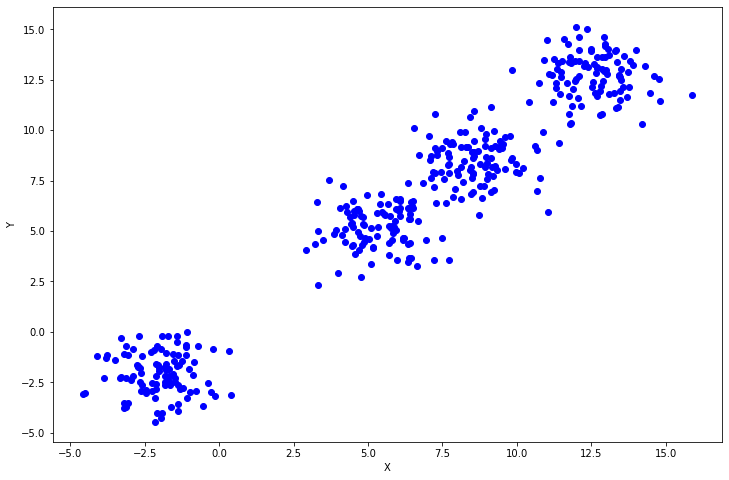

In [45]:
### Visualizamos la distribución de los datos mediante un Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data = df, x = "X",y = "Y", color="blue")
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

A simple vista se visualizan 4 Clusters, en donde podemos ver que a medida que aumenta el B tambien aumenta el A o viceversa 

In [46]:
### Probaremos utilizar el metodo de K medias con 4 clusters
k_means = KMeans(n_clusters=4)
k_means.fit(df)

KMeans(n_clusters=4)

In [47]:
### Visualizamos la coordenada del centro de cada Cluster
k_means.cluster_centers_

array([[ 8.61652662,  8.49416318],
       [-2.02060942, -2.06537343],
       [ 5.32221535,  5.2002277 ],
       [12.58328636, 12.73762716]])

In [48]:
### Mostramos las etiquetas
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3,

In [50]:
### inertia_ Nos muestra la suma de las distancias
### al cuadrado desde cada punto al centroide del cluster más cercano
k_means.inertia_

869.8739093873297

In [51]:
### Guardamos la distancia intra cluster en un diccionario
### Visualizaremos el número de clusters óptimo

dic = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    dic[k] = kmeans.inertia_

C:\Users\nmarq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [52]:
### Visualizamos nuestro diccionario
dic

{1: 24014.42675603128,
 2: 6315.372626899548,
 3: 1911.712161673669,
 4: 869.8739093873297,
 5: 789.2319716475774,
 6: 713.4844242406173,
 7: 633.8451512853579,
 8: 562.6250934636305,
 9: 510.0337550154989,
 10: 464.67168245312484}

C:\Users\nmarq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


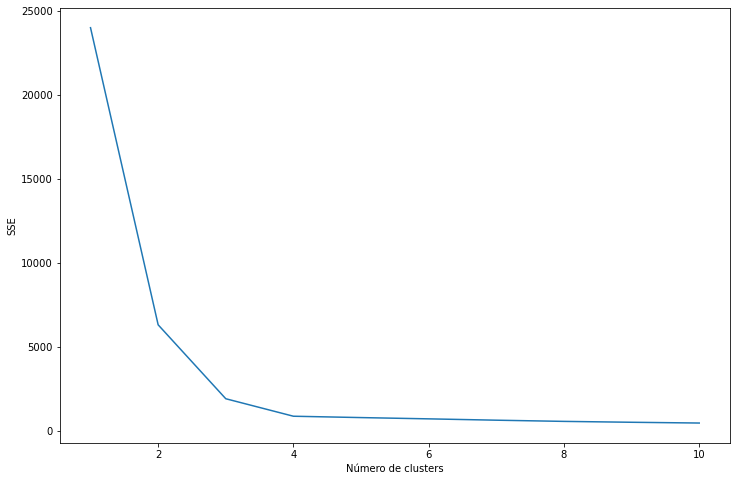

In [53]:
### Generamos la gráfica para visualizar el Metodo del Codo
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure(figsize=(12,8))
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

Según el método del codo, podemos decir que 4 clusters es el punto de quiebre

In [54]:
### Por lo que trabajaremos con 4 centroides, teniendo una etiqueta para cada cluster
df["Clase"] = k_means.labels_
centroides = k_means.cluster_centers_

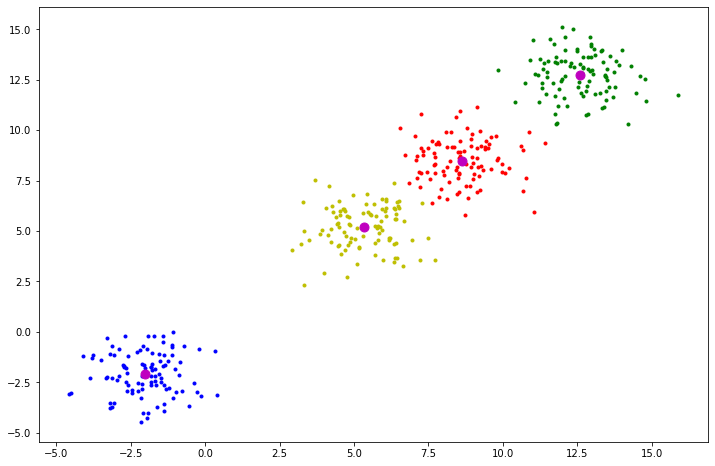

In [56]:
### Generamos un plot con 4 colores para representar cada cluster
color = ['r.', 'b.', 'y.', 'g.']
plt.figure(figsize=(12,8))

for i in range(0,4):
    plt.plot(df["X"][df["Clase"]==i],df["Y"][df["Clase"]==i],color[i])

### plot de todos los [datos,X] y todos los [datos, Y] del centroide
plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=9, label='centroides')


plt.show()